<a href="https://colab.research.google.com/github/Iambinhh/PROJECT_FINAL_AI/blob/main/Animal_Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout,Activation,BatchNormalization
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from tensorflow.keras.layers import LeakyReLU
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import math
import pandas as pd
import datetime
import time
import csv
from sklearn.model_selection import train_test_split
import os 
from PIL import Image
import sys




In [2]:
num_classes=10
img_rows,img_cols=128,128
batch_size=128

train_data_dir="/content/drive/MyDrive/ANIMAL_IMAGES/Training_dataset"
test_data_dir= "/content/drive/MyDrive/ANIMAL_IMAGES/Testing_dataset"

In [3]:
train_datagen=ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.3,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest'

)
test_datagen=ImageDataGenerator(rescale=1./255)


In [4]:
train_generator= train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
  test_data_dir,
  target_size=(img_rows,img_cols),
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=True
)



Found 7178 images belonging to 10 classes.
Found 1393 images belonging to 10 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())

print(class_names)

['BEAR', 'CAT', 'DOG', 'ELEPHANT', 'PARROT', 'RAT', 'RHINO', 'SNAKE', 'TIGER', 'WHALE']


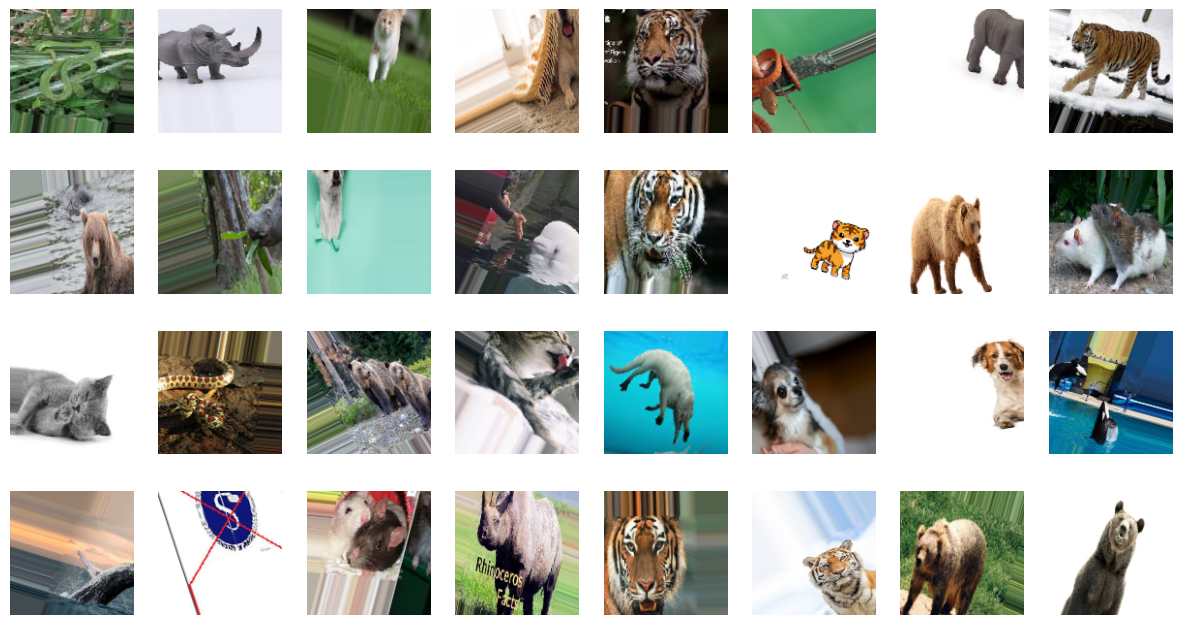

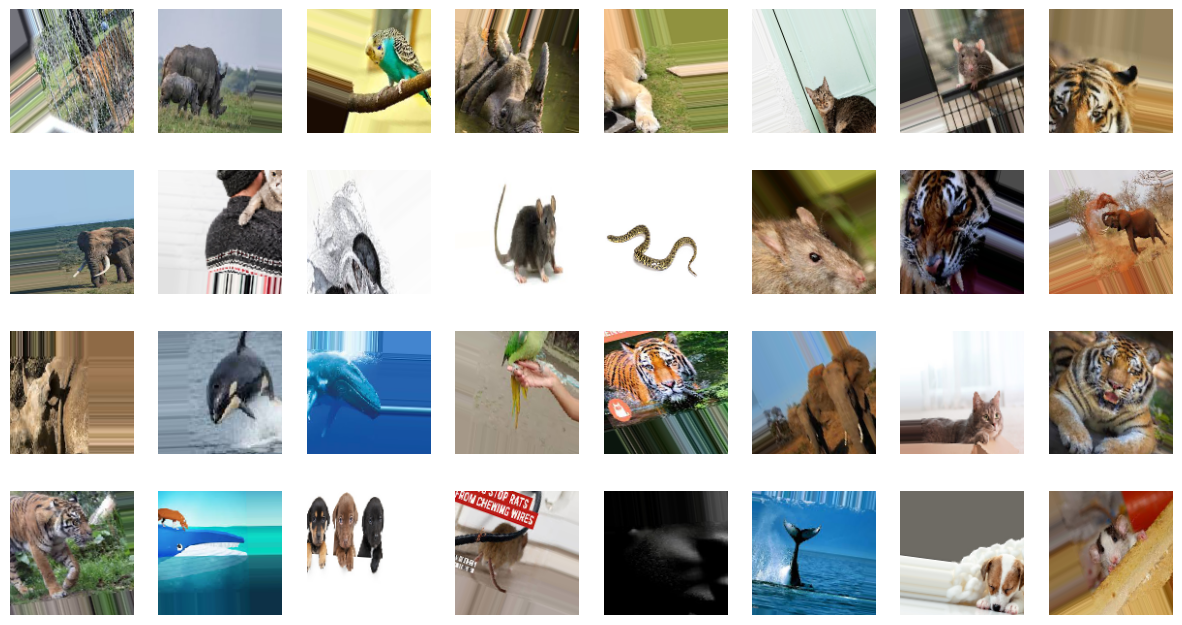

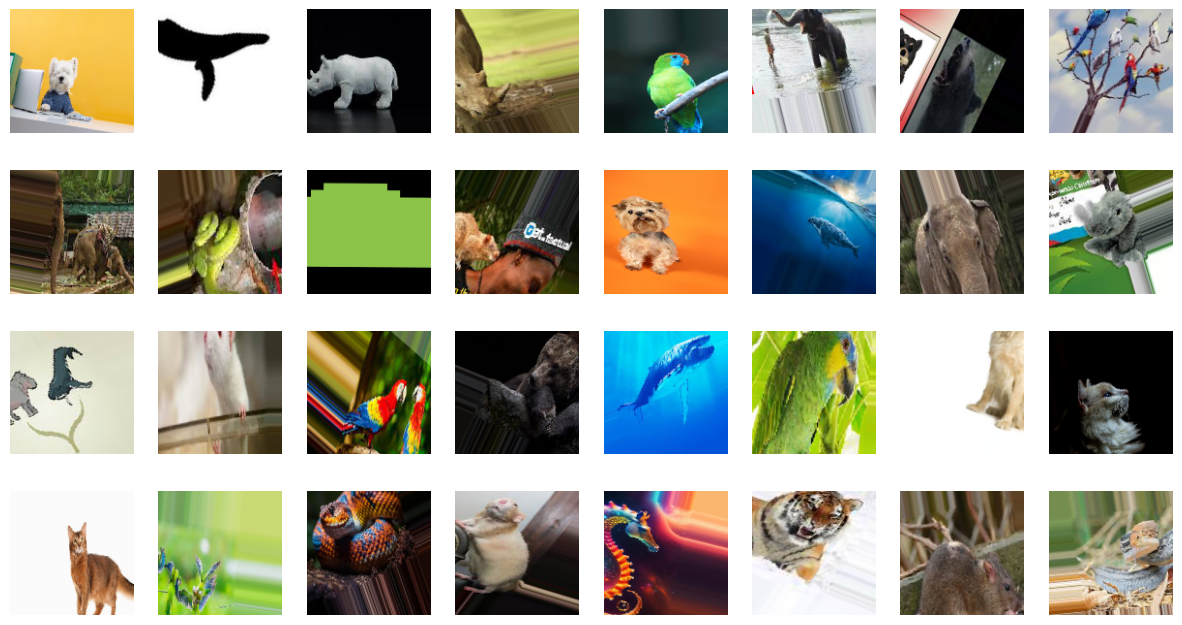

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


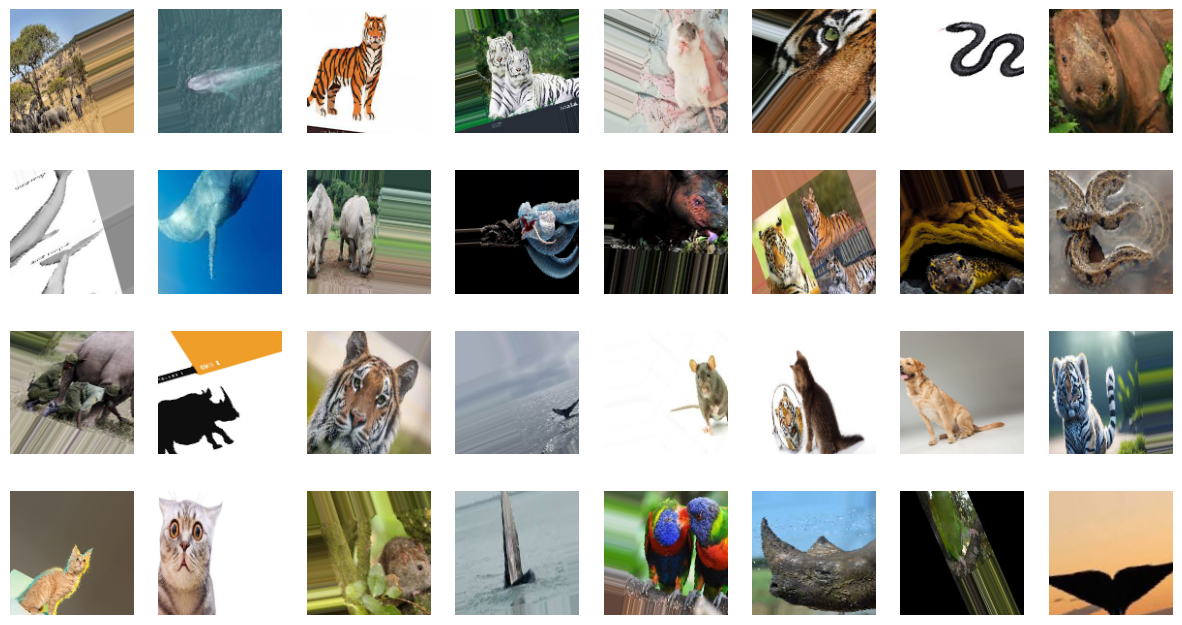

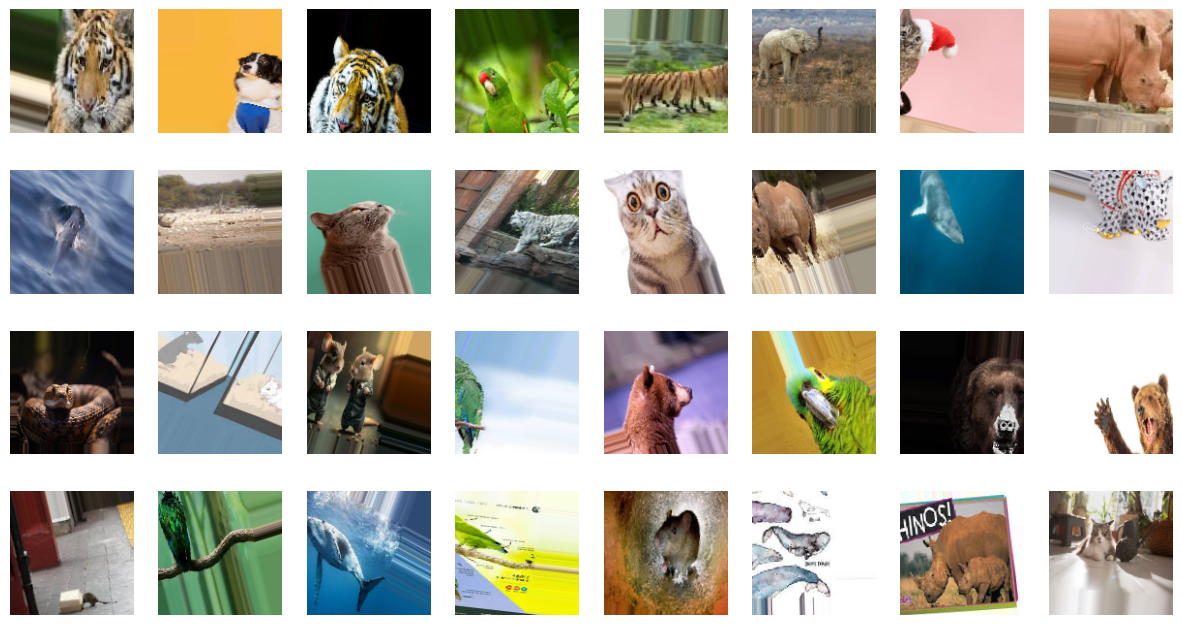

In [ ]:
for i in range(5):  # Display the first 5 batches of images
    # Get the next batch of images and labels
    batch = train_generator.next()
    images = batch[0]

    # Plot the images
    fig, axs = plt.subplots(4, 8, figsize=(15, 8))
    axs = axs.ravel()
    for j in range(32):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    plt.show()

In [5]:
model=Sequential()

#Nhân tích chập 32 lần
model.add(Conv2D(32,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

#Nhân tích chập 64 lần
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Nhân tích chập 128 lần
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        1

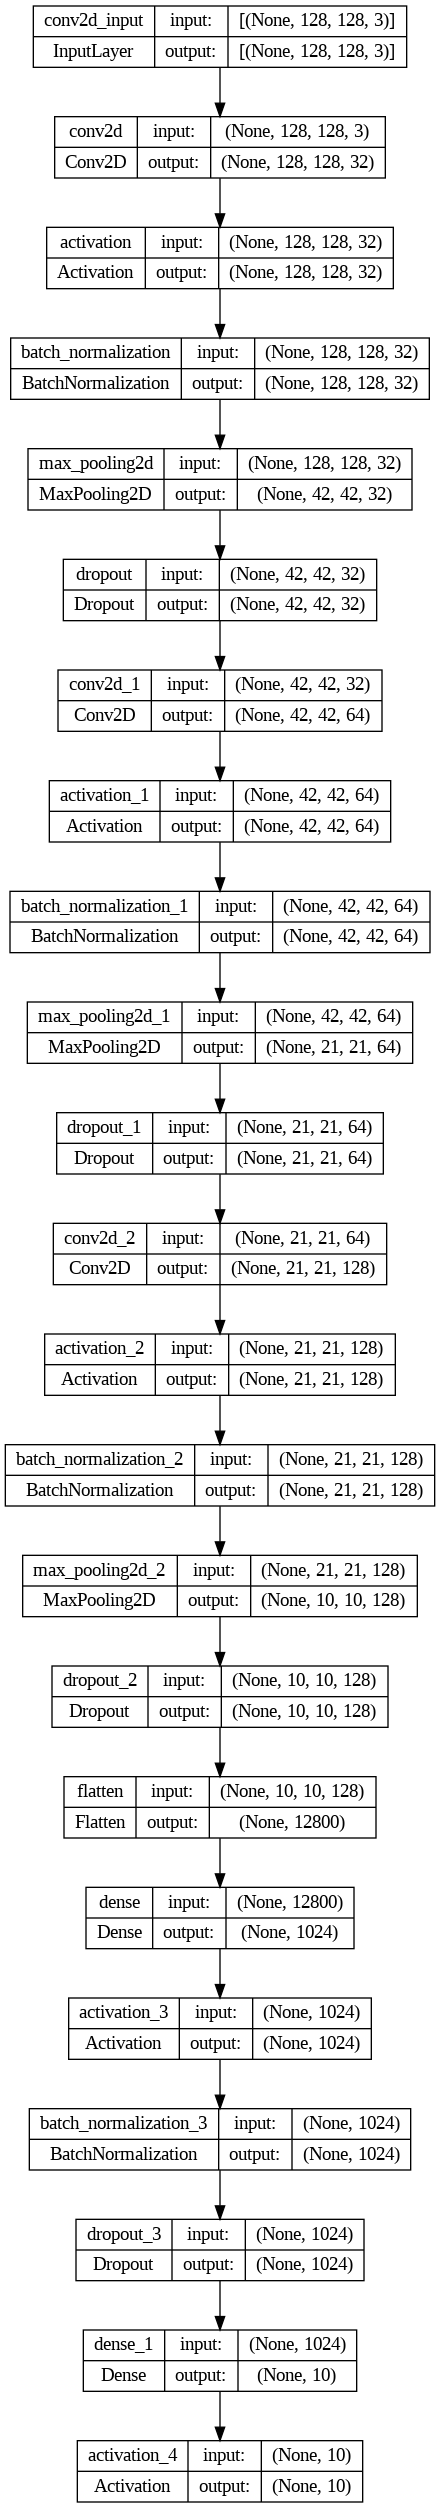

In [9]:
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/BT/animal_classify_2.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                          factor=0.2,  
                          patience=3,
                          verbose=1,
                          min_delta=0.0001)
callbacks=[checkpoint,reduce_lr]

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
nb_train_samples=2400
nb_test_samples=300
epochs=100
history=model.fit_generator(    
              train_generator,
              
              epochs=epochs,
              
              validation_data=test_generator,
              
    
)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-8-5e2180794e92>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/100
17/57 [=======>......................] - ETA: 33:53 - loss: 3.2301 - accuracy: 0.2167

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


57/57 [==============================] - 3542s 62s/step - loss: 2.5114 - accuracy: 0.2786 - val_loss: 3.8423 - val_accuracy: 0.1579
Epoch 2/100
57/57 [==============================] - 374s 7s/step - loss: 1.9949 - accuracy: 0.3564 - val_loss: 4.1941 - val_accuracy: 0.1472
Epoch 3/100
57/57 [==============================] - 352s 6s/step - loss: 1.8384 - accuracy: 0.3963 - val_loss: 3.7223 - val_accuracy: 0.1486
Epoch 4/100
57/57 [==============================] - 373s 7s/step - loss: 1.7818 - accuracy: 0.4061 - val_loss: 2.8246 - val_accuracy: 0.1788
Epoch 5/100
57/57 [==============================] - 351s 6s/step - loss: 1.6998 - accuracy: 0.4289 - val_loss: 3.5085 - val_accuracy: 0.1759
Epoch 6/100
57/57 [==============================] - 347s 6s/step - loss: 1.7398 - accuracy: 0.4231 - val_loss: 3.4321 - val_accuracy: 0.1852
Epoch 7/100
57/57 [==============================] - 352s 6s/step - loss: 1.6606 - accuracy: 0.4344 - val_loss: 2.5609 - val_accuracy: 0.2706
Epoch 8/100
57/5

UnknownError: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BT/animal_classification_2.h5')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BT/animal_classification_2.hdf5')

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

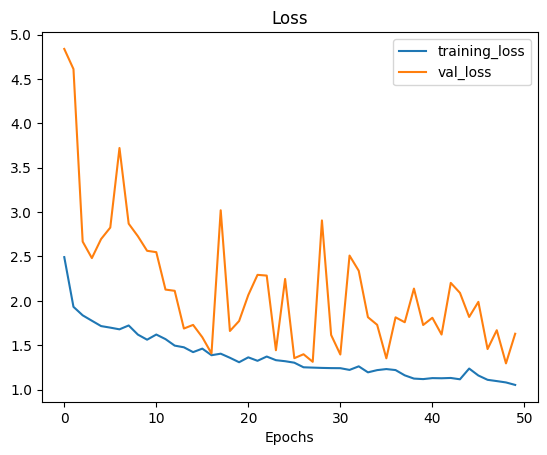

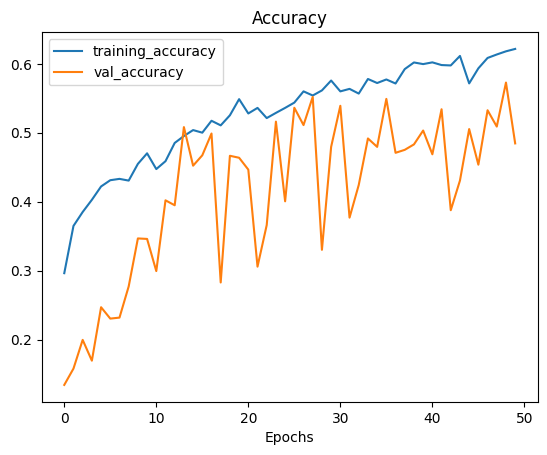

In [ ]:
plot_loss_curves(history)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BT/animal_classification_2.hdf5')

In [ ]:
acc=model.evaluate(test_generator,steps=len(test_generator),verbose=2)
print(acc)

11/11 - 4s - loss: 1.6289 - accuracy: 0.4846 - 4s/epoch - 371ms/step
[1.628901720046997, 0.4845656752586365]


In [ ]:
def predict_image(img):
  img=img.reshape(-1,128,128,3)
  prediction=model.predict(img).flatten()
  return {class_names[i]: float(prediction[i]) for i in range(10)}

In [ ]:
import gradio as gr

1/1 [==============================] - 0s 20ms/step
TIGER


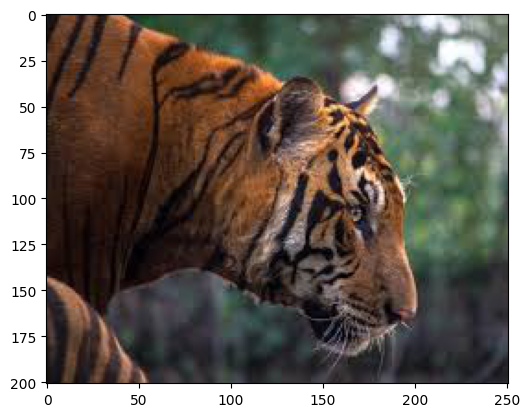

In [ ]:
url='/content/drive/MyDrive/ANIMAL_IMAGES/Testing_dataset/TIGER_TEST/tiger_1384.jpg'
classes=['BEAR', 'CAT', 'DOG', 'ELEPHANT', 'PARROT', 'RAT', 'RHINO', 'SNAKE', 'TIGER', 'WHALE']
img=load_img(url,target_size=(128,128))
plt.imshow(load_img(url))
img=img_to_array(img)
img=img.reshape(1,128,128,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
